Задача: научить модель машинного обучения предсказывать углы. 

Зачем это может быть нужно? Во-первых, для навигации: ваша модель может управлять дроном, самодвижущимся автомобилем, или виртуальным танчиком. Во-вторых, углы описывают любые циклические вещи, например, время суток (может быть, вы хотите предсказывать, в какое время лучше всего присылать клиенту сообщения). 

В чём проблема? В мере близости. Углы в 358 градусов и 3 градуса отличаются друг от друга совсем чуть-чуть, но какая-нибудь мера эр-квадрат будет за такие ошибки нещадно наказывать, запугивая и запутывая бедную модель. 

Решение: использовать тригонометрию. А именно, научите вашу модель предсказывать не сам угол $\alpha$, а $sin(\alpha)$ и $cos(\alpha)$. Синусы и косинусы соседних углов похожи, поэтому с метрикой проблем не будет. И из них можно однозначно вернуться к углу. 

Чем это удивительно: как правило, при построении модели стремятся сокращать размерность как входных, так и выходных параметров. И обычно это оправдано: чем меньше чиселок, тем лучше. Но вот в этом случае оказалось полезно увеличить размерность выхода ровно вдвое. 

Впрочем, чтобы не строить две различные модели, можно обучить одну нейронку с двумя выходами. Я взял самый что ни на есть ванильный перцептрон из ```sklearn```, только подвигал параметры, чтобы он на моих игрушечных данных сходился. 

Результат: при предсказании в тригонометрических осях ошибка (на кросс-валидации, конечно) падает в три раза *даже при возвращении в прежнее пространство*. 

Да здравствует тригонометрия!

In [1]:
# predicting the angle (in radians)
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
# generate toy data
np.random.seed(1)
X = np.random.normal(size=(100, 2))
y = np.arctan2(np.dot(X, [1,2]), np.dot(X, [3,0.4]))
# simple prediction
model = MLPRegressor(random_state=42, activation='tanh', max_iter=10000)
y_simple_pred = cross_val_predict(model, X, y)
# transformed prediction
joint = cross_val_predict(model, X, np.column_stack([np.sin(y), np.cos(y)]))
y_trig_pred = np.arctan2(joint[:,0], joint[:,1])
# compare
print(r2_score(y, y_simple_pred)) # R^2 about 0.53
print(r2_score(y, y_trig_pred))   # R^2 about 0.85

0.531318212747
0.852715552653


А вот немножко визуализации данных. Тригонометрическая модель меньше боится перепутать 1 и 359 градусов, и от этого меньше путается.

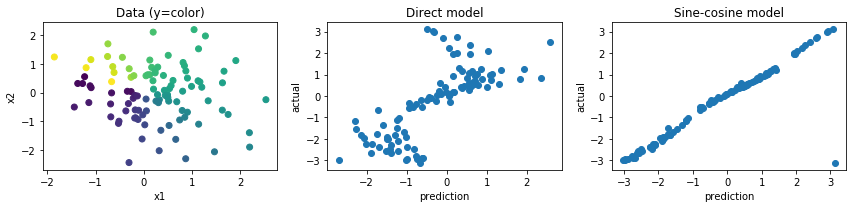

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Data (y=color)'); plt.xlabel('x1'); plt.ylabel('x2')
plt.subplot(1,3,2)
plt.scatter(y_simple_pred, y)
plt.title('Direct model'); plt.xlabel('prediction'); plt.ylabel('actual')
plt.subplot(1,3,3)
plt.scatter(y_trig_pred, y)
plt.title('Sine-cosine model'); plt.xlabel('prediction'); plt.ylabel('actual')
plt.tight_layout();